In [4]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Graphics

Before, we go any further with scientific computation, let us insert visualization by means of graphics first. This will make the course content in the following chapter much more accessible, because:

<span style="font-family:Apple Chancery"><font size="4"> - A graph is worth a thousand records (and more) -</font></span>

Graphics provide an easy way to display information extracted from data to the beholder. While graphics are a major tool for reporting purposes, reporting may already mark the endpoint of your journey with the data. Instead of creating graphics only as a final step, they should also be considered at the very beginning of a project: when exploring a dataset for the first time. While creating different plots for a dataset, we will therefor try to explain any oddities we find. 

Python offers several packages, which allow a quick look at your data using basic plot types. The respective functions to build these plots in a basic fashion using the default preferences are highly customizable. 

## Matplotlib

A popular library for graphics in python is [matplotlib](matplotlib). Its functionality is accessed by importing its **API** (commonly under the alias *plt*) ```matplotlib.pyplot as plt```. It works seamlessly with numpy arrays and pandas objects, making it the library of choice here.

In general, when creating a plot, we create a *figure* to which we add *axes* objects. 

```pyplot``` functions then specify which part of the figure is adressed and adds objects to it. Such parts include for example the axes, title or drawing area. In order to customize a plot, you can stack these function calls, since the invoked states will be preserved until the concluding ```plt.show()``` statement creates the graph.

In the following, we will look at basic examples of different plots and learn the more specific syntax on the fly. For an overview of plots and how to create them, look at [this gallery of plots](https://matplotlib.org/stable/gallery/index.html) from matplotlib.


We will use some modified credit card data from [this kaggle page](https://www.kaggle.com/sakshigoyal7/credit-card-customers).

In [3]:
df = pd.read_csv("../data/bank_churners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,0.000


In order to create a meaningful plot, the type must be chosen depending on the type of the variables which are usually either categorical or numerical. The latter may be further categorized into integers and floats while integers often indicate an ordinal scale and floating point numbers typically point to real values which are on a metric scale (sometimes metric scaled variables are also provided as integers).

### Categories 

Such variables are usually (but not necessarily) of type string. After identifying a variable to be categorical, one must decide whether it is of ordinal - the levels can be ranked - or nominal scale - they cannot be ranked. Examples from our dataset are *Income_Category* for ordinal and *Martial_Status* for nominal scale. 

For categorical variables, bar charts and histograms are maybe the first plot type you should consider. The difference however, is only the order and vizualisation: ordinal data uses histograms, which appear column to column in a defined order, nominal data uses barcharts with spacing between the columns and no specific order. To build the standard plots, we need not do more than call the ```hist()``` or ```bar``` function with the respective data.

#### Bar Charts

We need to provide the categories and the height of the variable. With the ```.unique()``` method, we get all levels present in the variable, with `.calue_counts()` we get the number of occurrences.

<BarContainer object of 4 artists>

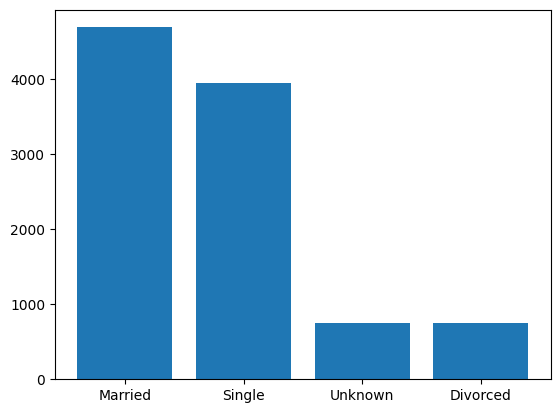

In [10]:
plt.bar(df.Marital_Status.unique(), df.Marital_Status.value_counts())  #create object

:::{admonition} Warning
Jupyter Notebook will automatically display graphics from a matplotlib object. Using the statement above would not create a plot elsewhere, as this only creates an object for plotting. 

Use the ```plt.show()``` statement!
:::

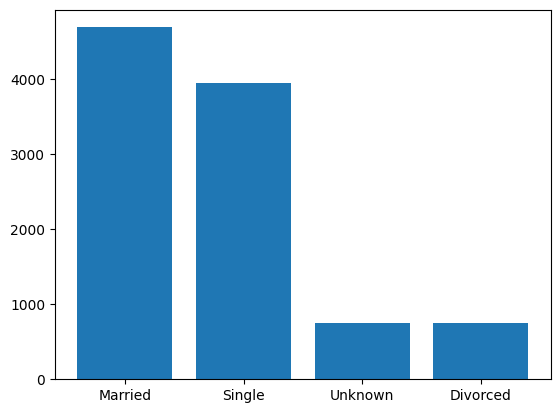

In [11]:
plt.bar(df.Marital_Status.unique(), df.Marital_Status.value_counts())
plt.show()    # show image

#### Histograms

Histograms are used, when the distribution of a numerical variable should be displayed

The default number of bins in matplotlib is 10 with equal spacing. For a more detailed look or further processing, we can use the `hist()` function to get the number of samples in each bin, the borders of the bins and the patches, i.e.the displayed parts of the histogram.

Let's change the number of bins to 5 and view these unpacked parts. (Note that jupyter will print the plot any way)

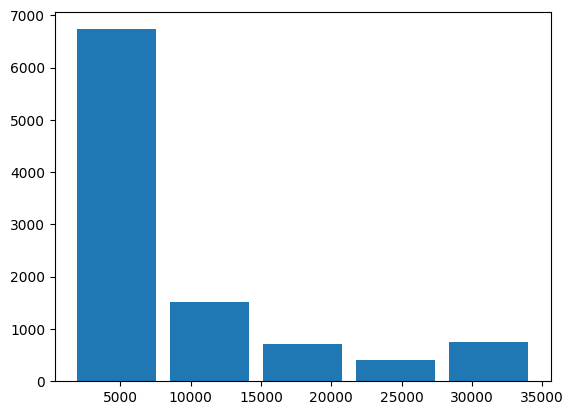

samples in bin: [6735. 1520.  706.  413.  753.] 
bin borders: [ 1438.3   8053.84 14669.38 21284.92 27900.46 34516.  ]
patches: Rectangle(xy=(1934.47, 0), width=5623.21, height=6735, angle=0) Rectangle(xy=(8550.01, 0), width=5623.21, height=1520, angle=0)


In [12]:
n, bins, patches = plt.hist(df.Credit_Limit, bins=5, rwidth=.85)
plt.show()
print('samples in bin:', n, '\nbin borders:', bins)
print('patches:', patches[0], patches[1])

We see that the ticks are not automatically matching the bars. To solve this, we can use the bin borders, ```bins``` from above, to set the ticks and labels on the x axis.

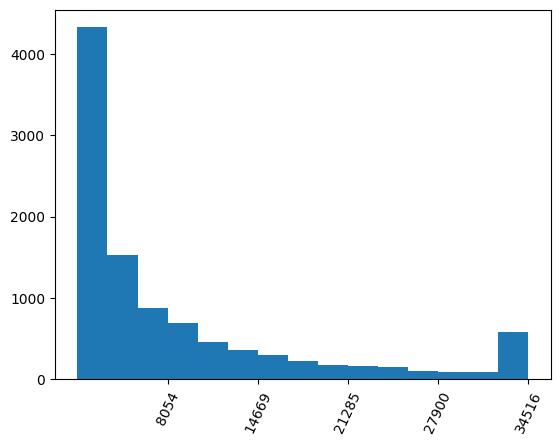

In [13]:
plt.hist(df.Credit_Limit, bins=15)
plt.xticks(ticks=bins[1:], rotation=65)    # set xticks at bin border
plt.show()

### Subplots

We can compare two results side by side, using the ```subplot(nrow, ncol, index)``` function.
We specify how many plots to show by the number of rows and columns in the parentheses. To make one cell of the figure the current subplot, call the subplot function before.

- At first, we specify a larger figure size. 
- We choose 15 bins
- For colours, *matplotlib* automatically recognizes RGB and RGBA when a 3- or 4-tuple is provided to `color`
- We also add titles and change the colours to better differentiate between the plot from above and the modified one. Nore the state based approach of calling these functions subsequently
- Since the tick labels in the right plot are too long and would overlap, we rotate them

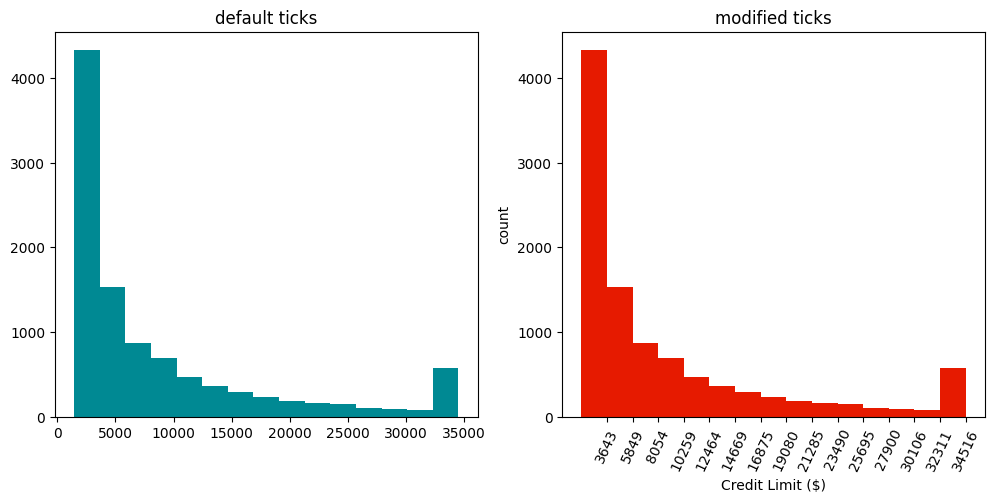

In [14]:
plt.figure(figsize=(12,5))    # this will stretch/compress the plots to fit the figsize

plt.subplot(1,2,1)    # first subplot of two in one row
plt.hist(df.Credit_Limit, bins=15, color=(0,137/255,147/255))
plt.title('default ticks')    # add title

plt.subplot(1,2,2)    # second subplot
n, bins,_ = plt.hist(df.Credit_Limit, bins=15, color=(.9,.1,0,1))
plt.title('modified ticks')

plt.ylabel('count')
plt.xlabel('Credit Limit ($)')
plt.xticks(ticks=bins[1:], rotation=65)    # set xticks at bin border

plt.show()   # only after all subplots have been defined

The rightmost bar strikes the eye as it interrupts the decreasing trend seen towards higher values. If we check for the occurence of the maximum value by `Python len(df[df.Credit_Limit == max(df.Credit_Limit)])`, we find it occurs 508 times. This is in indication, that the dataset has been clipped. Meaning that values higher or lower than some critical values are overwritten by these values. 

See this numpy example with the ```clip()``` function:

In [16]:
print(np.clip([-1,2,3,4,11,100], 3, 4))    # the list values are clipped to 3 and 4, respectively

[3 3 3 4 4 4]


A more special case arises for the variable **Income_Category** which is already binned to categories but can be ranked. We would want to order the bars accordingly.

While the default ```plt.bar()``` would only make a random order of the categories, we can specify this order by providing the tick positions and labels. Another way to do this is by mapping the values to integers, according to their rank. Either way, some work by hand is required to reorder the bars.

We will define a dictionary containing k-v pairs for mapping and then use pandas' ```map()``` function (You will learn about pandas in the next chapters).

In [17]:
(df.Income_Category.unique())    # get unique values to biuld dict in next step

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [19]:
map_income = {'Unknown': 0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
print(pd.concat( [df.Income_Category[:3], df.Income_Category[:3].map(map_income)], axis=1))

   Income_Category  Income_Category
0      $60K - $80K                3
1   Less than $40K                1
2     $80K - $120K                4


We will use a different syntax for creating subplots this time, using the ```subplots()``` function (plural!). It unpacks into a *figure* and an *axes* object. (We could use this syntax for just one plot, too.) Since we want to display 3 subplots, we unpack the axes objects into a tuple of length 3. We call these objects ```ax1```, ```ax2``` and ```ax3```. The respective plot method will then be called on these objects. The commands for ticks etc. change from the case before.

Note that for the second plot, we could have used a list in the desired order. The dict, i.e. the values of the dict, are only used for the histogram.

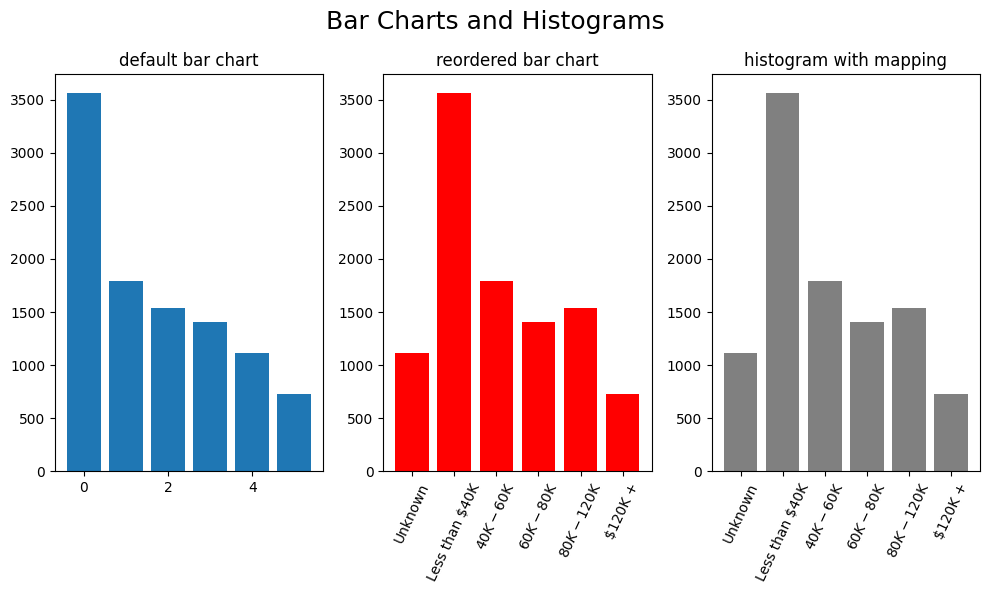

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,6))     # unpacking into figure and 3 axes objects

fig.suptitle('Bar Charts and Histograms', fontsize=18)

ax1.bar(range(len(df.Income_Category.unique())), height=df.Income_Category.value_counts())
ax1.title.set_text('default bar chart')

ax2.bar([k for k,v in map_income.items()], color='red', 
        height=[df.Income_Category.value_counts()[k]
                for k,v in map_income.items()],)    # unpack keys as labels, note that a list would suffice here
ax2.title.set_text('reordered bar chart') 
ax2.set_xticks(range(6))    # warning if not specified before the labels
ax2.set_xticklabels([k for k,v in map_income.items()], rotation=65)

n, bins, _ = ax3.hist(df.Income_Category.map(map_income), bins=6, rwidth=.8, color='grey')
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
ax3.set_xticks(bins[:-1]+bin_width)  
ax3.set_xticklabels([k for k,v in map_income.items()], rotation=65) # unpack keys as labels
ax3.title.set_text('histogram with mapping')

plt.tight_layout()    # rearrange subplots for a better look
plt.show()

We can see that we basically built the same plot (middle and right) by using a bar plot and a histogram. Now, there are many more options on how to build histograms. One last example is to display two variables in the same plot: a grouped and stacked histogram

It should be noted, that the values should lie in the same range approximately. For the first plot, we provide the variables as a list to the ```hist()``` function. For the second plot, we use the state based approach and create two plots which we display in the same graphic.

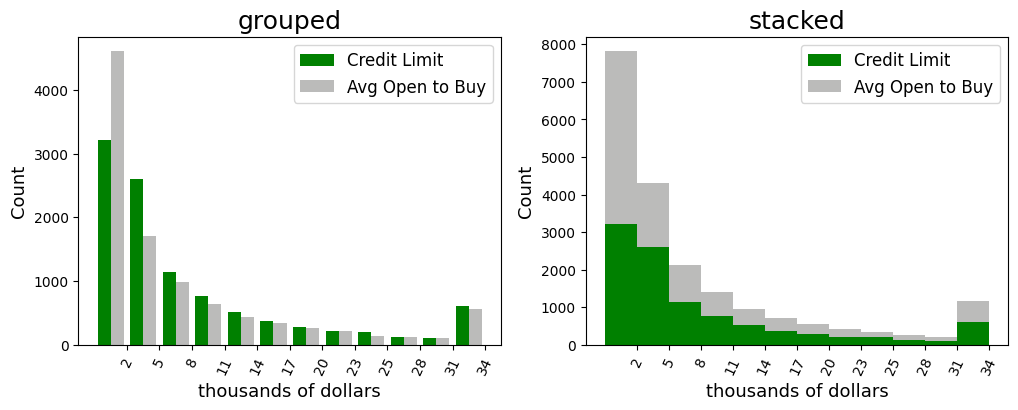

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))     # unpacking into figure and 2 axes objects

n, bins, _ = ax1.hist([df.Credit_Limit, df.Avg_Open_To_Buy], bins=12, 
                     color=['green', (142/255,142/255, 141/255, .6)])
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
ax1.set_xticks(bins[1:])  
ax1.set_xticklabels([int(b/1000) for b in bins[1:]], rotation=65) 
ax1.title.set_text('grouped')
ax1.title.set_fontsize(18)
ax1.legend(['Credit Limit', 'Avg Open to Buy'], fontsize='large')
ax1.set_xlabel('thousands of dollars', fontsize = 13)
ax1.set_ylabel('Count', fontsize = 13)

n, bins, _ = ax2.hist([df.Credit_Limit, df.Avg_Open_To_Buy], bins=12,
                     color=['green', (142/255,142/255, 141/255, .6)], stacked=True)
ax2.set_xticks(bins[1:])  
ax2.set_xticklabels([int(b/1000) for b in bins[1:]], rotation=65) 
ax2.title.set_text('stacked')
ax2.title.set_fontsize(18)
ax2.legend(['Credit Limit', 'Avg Open to Buy'], fontsize='large')
ax2.set_xlabel('thousands of dollars', fontsize = 13)
ax2.set_ylabel('Count', fontsize = 13)


plt.show()

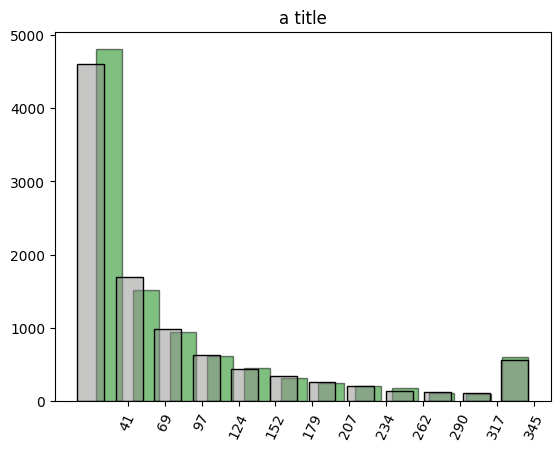

In [23]:
n, bins, _ = plt.hist([df.Credit_Limit], bins=12, rwidth=.7, color=['green'], alpha=.5, edgecolor='black')
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
plt.xticks(bins[1:], [int(b/100) for b in bins[1:]], rotation=65) 

n, bins1, _ = plt.hist([df.Avg_Open_To_Buy], bins=12, rwidth=.7, 
                     color=[(142/255,142/255, 141/255, .5)], edgecolor='black')

plt.title('a title')
plt.show()

The basic framework stays the same for all other plots that can be created using matplotlib. We will have a look at two more examples before switching to a different library more specific for statistical plots.

### Numerical Data

Beside categorical data, we often deal with numerical data. We have already used **Credit_Limit** for a histogram so far. 

#### Scatter Plots

This kind of plot uses uses variables from the dataset on both axes, unlike before where we saw the count on the y-axis. Scatter plots are particularly useful for checking relationships between two variables. To create a scatterplot, use ```plt.scatter()```.

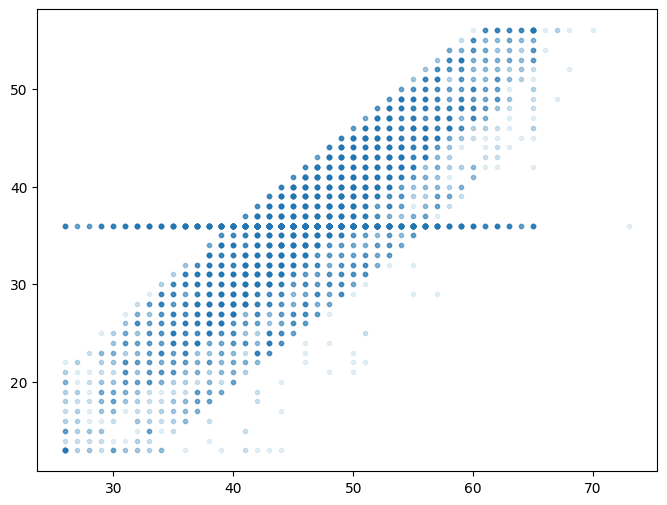

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df.Customer_Age, df.Months_on_book, marker='.', alpha=.1)
plt.show()

We clearly see a positive linear correlation between the two variables. We also see, that one value of Months_on_Book appears throughout all ages. This is likely from imputing missing values, i.e. if this information is not available, the system instantly or some data engineer later set the value to the mean or some other statistical indicator.

Let's quantify the high correlation between the variables and then see if we can find out more about the value appearing almost as horizontal line.

In [26]:
print(np.round(np.corrcoef(df.Customer_Age, df.Months_on_book)[0][1], 2))

0.79


In [27]:
print(df.Months_on_book.value_counts().iloc[:3])    # no surprise, it is the most frequent number for this variable

Months_on_book
36    2463
37     358
34     353
Name: count, dtype: int64


In [30]:
print(f'mean of whole dataset: {df.Months_on_book.mean():.2f}')
print(f'mean without 36 months at all: {df[df.Months_on_book!=36].Months_on_book.mean():.2f}')

mean of whole dataset: 35.93
mean without 36 months at all: 35.91


Another way to make your scatterplots more fancy and more informative, is through grouping by some third variable and display these groups using different colours. This is particularly interesting for categorical variables, where the markers are coloured according to the single levels.

Note the dictionary containing the colour codes for the categories and the ```for``` loop used to create axes objects. We could have used the `c=df.Card_Categories.map(card_col)`, but then we would not get a legend.

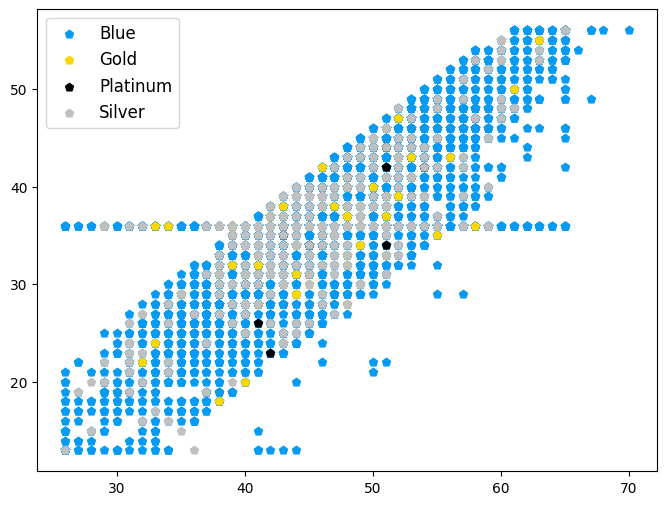

In [32]:
fig, ax = plt.subplots(figsize=(8,6))

# use only rows in upper half of total revolving balance for less data points
groups = df[df.Total_Revolving_Bal > df.Total_Revolving_Bal.mean()].groupby(df.Card_Category)

# dictionary with 
card_col = {'Blue': '#069AF3', 'Gold': 'gold', 'Platinum': 'black', 'Silver': 'silver'}

# loop over the groups to create axes objects
for name, group in groups:
    ax.scatter(group.Customer_Age, group.Months_on_book, marker='p', alpha=1, label=name, color=card_col[name])
ax.legend(prop={'size': 12})

#show in same plot
plt.show()

Beside the colour, the **marker size** can also be customized to display a relative difference between third variables of the observations. 

Note that the size parameter ```s``` needs an numerical input, which could refer to categories, e.g. through mapping.

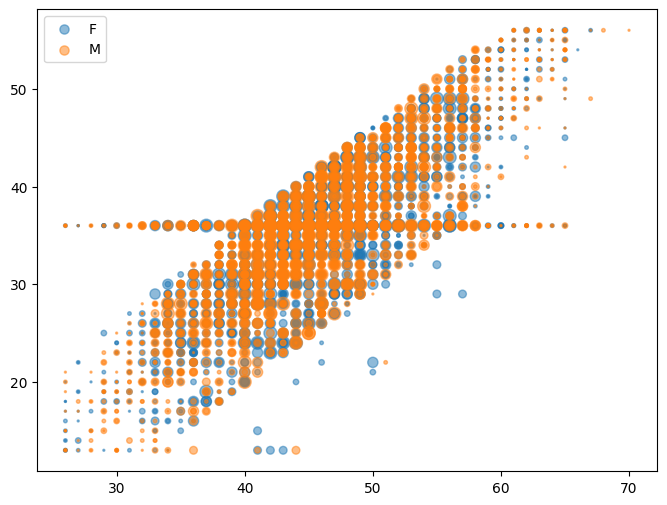

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

# use only rows in upper half of total revolving balance for less data points
groups = df[df.Total_Revolving_Bal > df.Total_Revolving_Bal.mean()].groupby(df.Gender)

# loop over the (two) groups to create axes objects
# make marker size according to fourth variable
for name, group in groups:
    ax.scatter(group.Customer_Age, group.Months_on_book, marker='.', alpha=.5, label=name,
               s=(group.Dependent_count+2)**3)   # resizing might be necessary
ax.legend()

plt.show()

#### Line plots

The 'most standard' type of plot may be the **line plot**. It is used for example to display the evolution of a variable over time like in stock charts. Another example would be the visualisation of a fit curve or some distribution in a histogram.

To create a lineplot, use the ```plot()``` function. We will at first look at how to plot a normal distribution and then simulate random variables accordingly to compare them in a histogram.

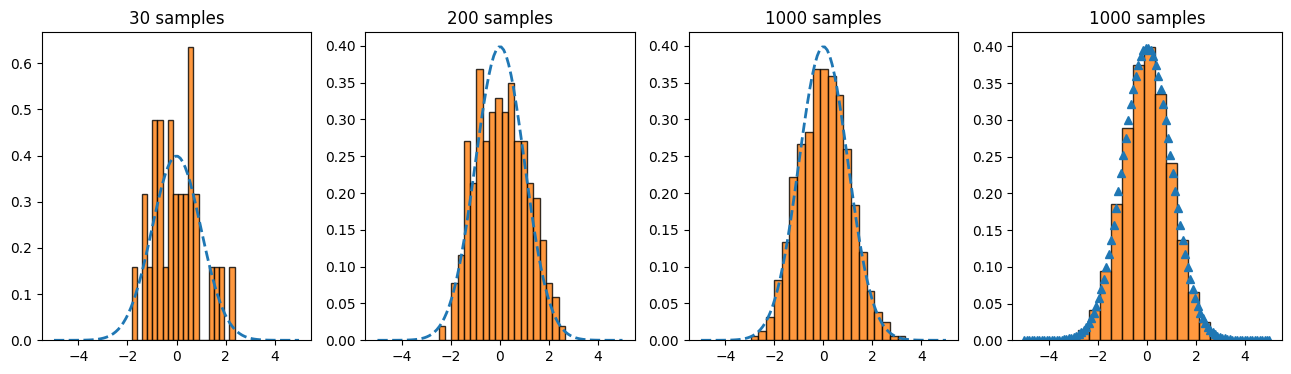

In [35]:
# define function for plotting
def my_gauss(x, mu, sig):
    return (1/(sig * np.sqrt(2* np.pi))) * np.exp(-.5 * ((x-mu)/sig)**2)
    
# define x values
x = np.linspace(-5,5, 100)

# y values
y = my_gauss(x, 0 ,1)

# draw random numbers from standard normal
my_rands = np.random.normal(0,1,100000)
 
samples= [30, 200, 1000]

plt.figure(figsize=(16,4))

for i,s in enumerate(samples):
    plt.subplot(1,4,i+1)
    plt.plot(x,y, linestyle='--', lw=2)
    plt.hist(my_rands[:s], bottom=0, bins=20, density=True, alpha=.8, edgecolor='black')
    plt.title(f'{s} samples')
    
plt.subplot(1,4,4)
plt.plot(x,y, marker='^', ls='')
plt.hist(my_rands, bottom=0, bins=20, density=True, alpha=.8, edgecolor='black')
plt.title(f'{s} samples')
plt.show()

Matplotlib includes many useful shortcuts in customizing the graphics: colors (simply 'blue' instead of an rgb code), the markers (e.g. '^' for triangles) and the linestyle ('--' for a dashed line). They can be found in the documentation of the respective function. In general, it is always useful to check the documentation when creating a graph that should be beyond the standard, because of the mutltitude of built-in keywords. 

While Matplotlib offers the possibility to create and customize plots almost at will, it sometimes does not quite have the right plot readily availabe. For statistical plots and graphics, another library includes more predefinded functions for a wide variety of plot types.  

## Seaborn

[Seaborn](https://seaborn.pydata.org) is a library for statistical plots and graphs. It is based on matplotlib and thus works neatly with pandas and numpy as well. The advantage is the many plot types which are available which may be tiresome to build ourselves using matplotlib. Beside more available default plot types than in matplotlib, seaborn includes composite graphics, where one command automatically renders a set of graphics. This makes exploring of a dataset even quicker. In the following, we will show some of the above plots and new kinds of standard statistical plots in seaborn. 

The syntax is slightly different to matplotlib: The ```data``` argument specifies the dataframe/array and the variables are selected as strings. Note however, that since seaborn is built upon the matplotlib framework, we can still use the syntax used above. Furthermore, we can utilise some functions we have learned before. We would then just need to import matplotlib as well.

At first we will again look at bar plots. To create the same plot as in the beginning of this chapter in seaborn, we use the ```countplot()``` function. To rotate the ticks, we can use different approaches. Another difference to the examples with pyplot is the ```order``` keyword.

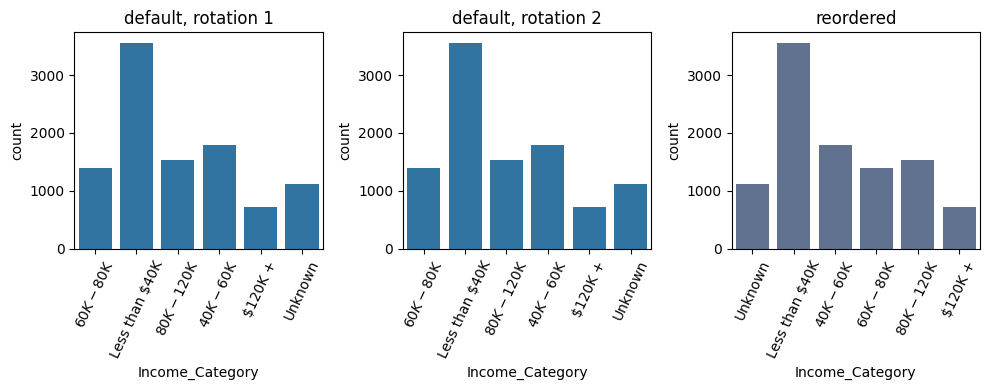

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.countplot(x = 'Income_Category', data = df)
plt.xticks(rotation=65)
plt.title('default, rotation 1')

plt.subplot(1,3,2)
ctplot = sns.countplot(x = 'Income_Category', data = df)
for item in ctplot.get_xticklabels():
    item.set_rotation(65)
ctplot.set_xticklabels
plt.title('default, rotation 2')
    
plt.subplot(1,3,3)
order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
color = (.35, .44 , .6)
new = sns.countplot(x = 'Income_Category', data = df, order=order, color=color)
plt.xticks(rotation=65)
plt.title('reordered')

plt.tight_layout()

For histograms additional functionality is readily available. The ```displot()``` function builds the basic histogram. In seaborn, we only need single keywords to build more advanced plots:

- ```kind``` defines the kind of plot
- ```col```/```row``` creates subplots for the levels of the respective variable
- ```hue``` creates one plot with all categories separately coloured
- ```rug```, if True, creates marignal ticks for every observation
- ```kde``` uses a dernel density estimation, i.e. it displays histogram and estimated density

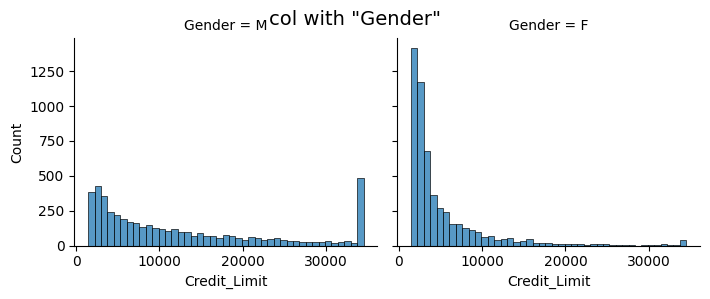

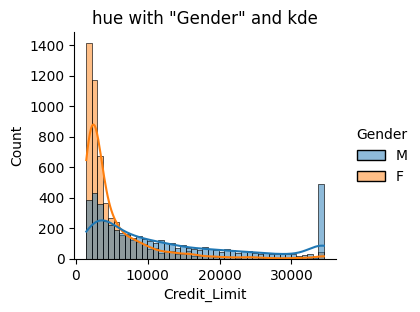

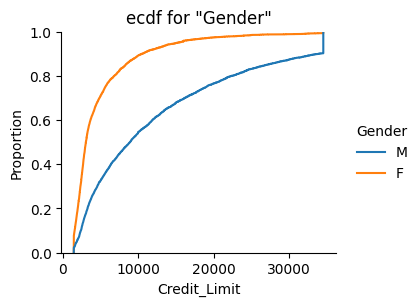

In [5]:
sns.displot(data=df, x="Credit_Limit", col="Gender", kind='hist', height=3, aspect=1.2)
plt.suptitle('col with "Gender"', fontsize=14)    # use suptitle, as subplots are automatically created

sns.displot(data=df, x="Credit_Limit", hue="Gender", kde=True, height=3, aspect=1.2)
plt.title('hue with "Gender" and kde')

sns.displot(data=df, x="Credit_Limit", hue="Gender", kind='ecdf', height=3, aspect=1.2)
plt.title('ecdf for "Gender"')
plt.show()

At this point, we will no longer repeat the plot types we have seen in the previous chapter. However, you are advised to check how to create them using seaborn and learn about the additional possibilities.

We will now look at some other plots which come with seaborn by default and may not be built so quickly using pyplot. A more complete set of available plot types can be found [here](https://seaborn.pydata.org/examples/index.html)

### Heatmaps

This is a special kind of plot, that is often used to visualize correlation matrices. It shows variables (or categories) on the axes and rectangles in the plot which are usually coloured with respect to some value. 

For a correlation matrix, we first have to calculate it using numpy. The resulting matrix can then be passed to seaborn. 

To compute the correlation, we need to either omit the categorical variables or use one-hot encoding. For this example, we will only look at numerical variables and use the usual Pearson correlation.

In [6]:
corr_df = df.select_dtypes('int64').drop('CLIENTNUM', axis=1)   # select only numerical variables
                                                                 # exclude system variable
corr_mat = corr_df.corr()    # create correlation matrix
corr_mat    # not using the print statement makes it more pretty thanks to jupyter

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.014780
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,-0.002688
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.008623
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,0.013726
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.042210
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,-0.053913
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,1.000000


We now only have to call seaborn's ```heatmap()``` function: 

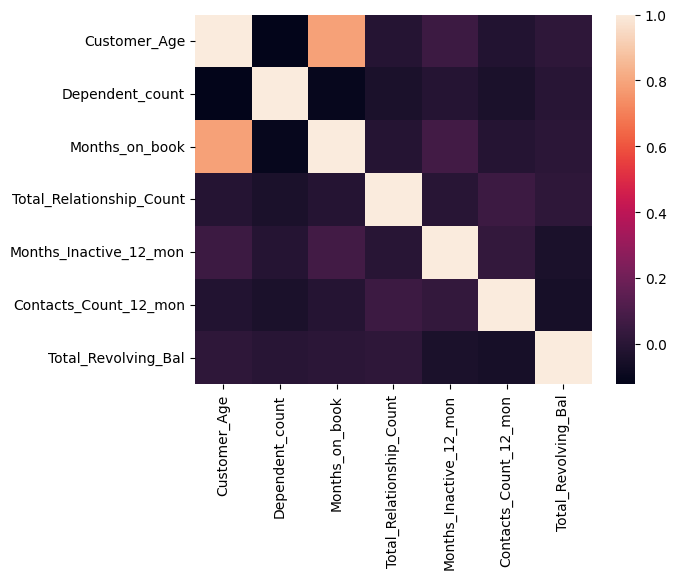

In [7]:
sns.heatmap(corr_mat)
plt.show()

The high correlation between 'Months_on_Book' and 'Customer_Age' we found earlier can now clearly be seen by the light field corresponding to a high correlation. We could further mask the upper half, since the matrix is symmetric and all information is included in one half. We will also add the rounded value of the correlation coefficient. At last, we use a custom colour map to try and get a better contrast for the lower values.

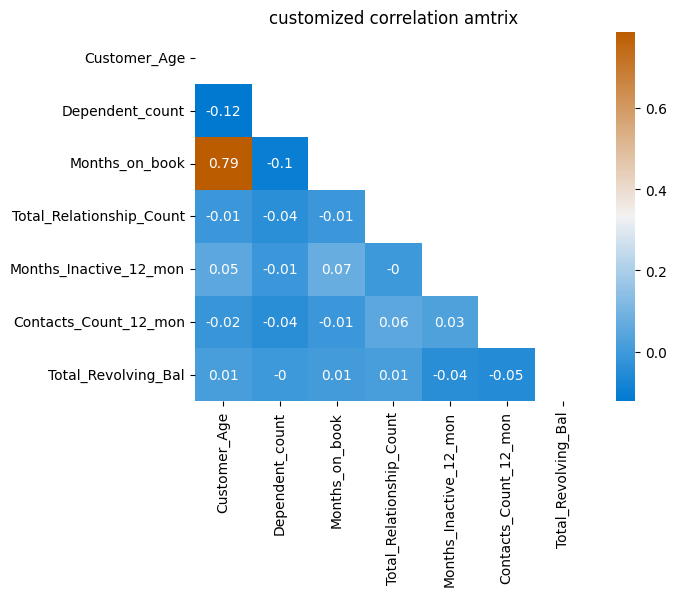

In [8]:
# create mask
mask = np.triu(np.ones_like(corr_mat))

# create custom colour bar
cmap = sns.diverging_palette(250, 390, l=50, s=100, as_cmap=True)

sns.heatmap(corr_mat, annot= np.round(corr_mat,2), mask=mask, cmap=cmap)
plt.title('customized correlation amtrix')
plt.show()

### Boxplot

Boxplots are used to depict several descriptive statistics of a numerical variable at once. The usually contain the following elements:

- a box, stretching from the first to the third quartile
- a line in the box, indicating the median value
- two whiskers, one pointing upwards and the other downwards

The whiskers may represent different quantities, like a specific quantile or even the maximum and minimum value. By default, the whisker length is definded by the inter-quartile range:
$a \cdot Q_{0.75} - Q_{0.25}$

The respective keyword for the factor $a$ is ```whis```, accepting a float.
In this configuration, outliers, i.e. data points above or beyond the respective quantiles, are shown as single dots. 

The whiskers are only drawn to the maximum/minimum value in each direction, meaning that one whisker could be shorter than the other or be omitted completely, if no data points fall in this interval.

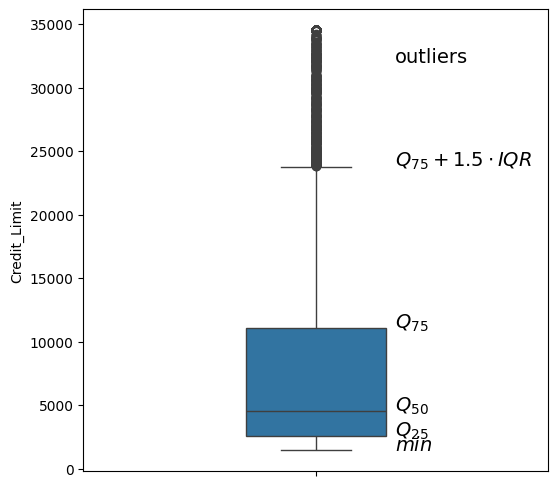

In [12]:
plt.figure(figsize=(6,6))
x_val = .17
sns.boxplot(y=df.Credit_Limit, whis=1.5, width=.3)
plt.text(x_val,32e3,'outliers', fontsize=14)
# interquartile range
iqr = np.quantile(df.Credit_Limit, .75) - np.quantile(df.Credit_Limit, 0.25)

# upper whisker -> max value inside (Q_75 + 1.5 IQR)
plt.text(x_val,np.quantile(df.Credit_Limit,.75)+1.5*iqr,'$Q_{75}+1.5 \cdot IQR$', fontsize=14)

# Quartile
plt.text(x_val,np.quantile(df.Credit_Limit, .75),'$Q_{75}$', fontsize=14)
plt.text(x_val,np.median(df.Credit_Limit),'$Q_{50}$', fontsize=14)
plt.text(x_val,np.quantile(df.Credit_Limit, .25),'$Q_{25}$', fontsize=14)

# lower whisker -> min value inside (Q_25 - 1.5 IQR)
plt.text(x_val,max(np.quantile(df.Credit_Limit,.25)-1.5*iqr, min(df.Credit_Limit)),'$min$', fontsize=14)
plt.show()

### Violin Plot

A plot showing similar information (and is maybe more aesthetic) is the violin plot. It includes a kernel density estimation which is shown on both sides of the middle axis. This adds visual information beyond the quartiles and outliers, by displaying the distribution of values.

Specifying ```inner="quartile"``` introduces respective lines for the 1st, 2nd and 3rd quartile.

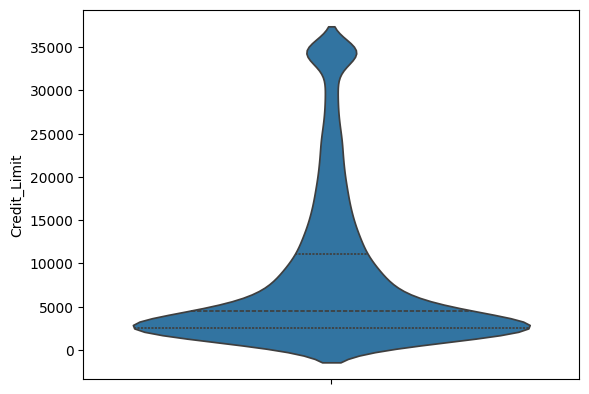

In [13]:
sns.violinplot(data=df.Credit_Limit, inner="quartile")
plt.show()

We can display the distribution of one variable with respect to the (customized order) levels of a second variable. Furthermore, we can also use a 'hue' for a third variable. For dichotomous variables, setting ```split=True``` makes use of both sides of a violinplot, instead of creating sets of two violinplots.  

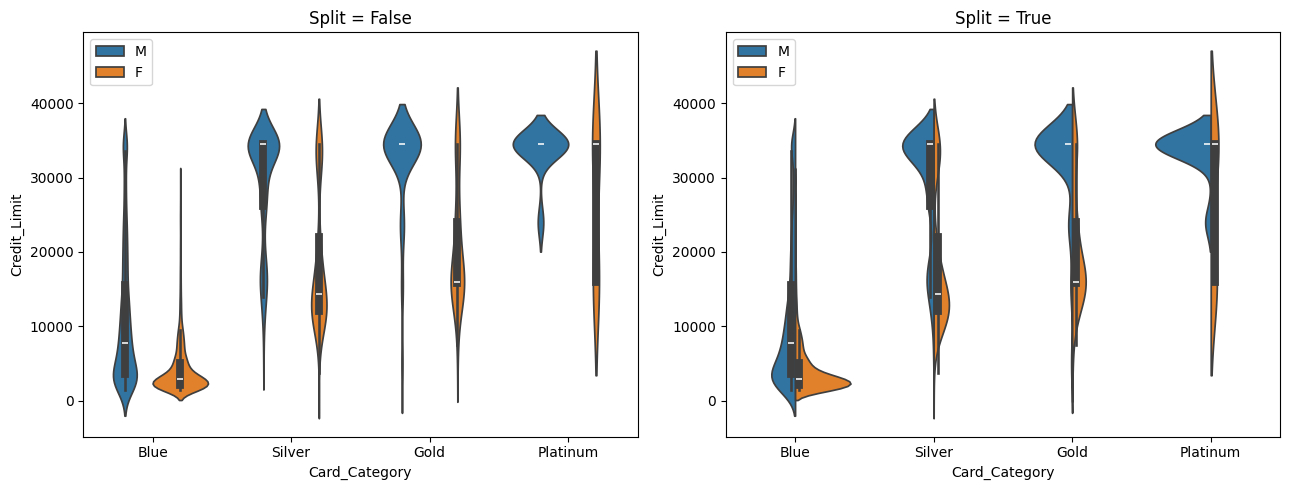

In [14]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.violinplot(data=df, y='Credit_Limit', x='Card_Category', hue = 'Gender', split = False,
               order=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend(loc=2)
plt.title('Split = False')
plt.subplot(1,2,2)
sns.violinplot(data=df, y='Credit_Limit', x='Card_Category', hue = 'Gender', split = True,
               order=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend(loc=2)
plt.title('Split = True')

plt.tight_layout()

plt.show()

## Plotly

<span style="font-family:Apple Chancery"><font size="4"> - An interactive graph is worth a thousand static graphs -</font></span>

So far, we have introduced static plots. An extension to this are interactive plots. Interactivity means for example displaying additional information when hovering the mouse over data points, selecting single traces from the legend or being able to select a value range with a slider. To display time varying effects, animated graphics can be a suitable choice.

To build such graphics, we will use the package [**plotly**](https://plotly.com). Plotly is based on javascript and uses dictionaries when it comes to specifying style options etc., meaning that nested dictionaries are often needed in order to get to a desired option/function argument. The interactive plots produced are web-based, i.e. in the html format. Accordingly, they will by default open in a browser (like jupyter notebook does) or can be viewed inside notebooks. Note however that plotly also supports the export of static graphics. This can be specifically interesting, as an interactive graphic may be altered by hand and subsequently exported as a static image. 

The basis of plotly is the ```plotly.graph_objects``` module (imported as ```go```). Conveniently, a higher-level API called ```plotly.express``` is available, sparing us "between 5 and 100 times" 
[$^1$](https://plotly.com/python/plotly-express/) the necessary code, while still maintaining the optionality of including *graph_objects*. However, sometimes it is better to work with `go` only.

The syntax for plotly express is more similar to seaborn than to matplotlib. Meanwhile, the syntax for plotly *graphic_objects* needs more detail due to the high level of customizability. We will now display some of the standard graphics with the default plotly interactivity, starting by importing plotly express and pandas and loading the data.

In [4]:
credit_cards = pd.read_csv("../data/bank_churners.csv")
plot_df = credit_cards.groupby(by=["Marital_Status"]).size().reset_index(name="count")
plot_df

,Marital_Status,count
0,Divorced,748
1,Married,4687
2,Single,3943
3,Unknown,749


When using the **express** API, the plot function is called as usual. The first argument is the dataframe, containing the variables for the plot. Then follow the axes with the **variables as strings** and finally some customization keywords. Note that a dataframe does not need to be specified, if calling the x (y, z) axis with a pandas Series.

We will again look at barcharts and histograms first. The respective functions are ```bar()``` and ```histogram()```, where we use the dataframe as first argument. Then we specify the axes arguments ```x=, y=```. 

In order to make a bar plot showing the counts, we need to create a dataframe with this information first. We use panda's ```groupby()``` followed by ```size()``` before resetting the index to get the counts not as index, but variable.

We now use the ```px.bar()``` function to create a Figure object in line one. The first argument takes the dataframe, ```x``` and ```y``` the variables we want to plot **as strings**. Additionally, we can set the size of the figure using ```width``` and ```height```. The categories are by default ordered alphabetically. Finally, as we have seen for matplotlib, we use fig's ```show()``` method to display the graphic.

In [5]:
fig = px.bar(data_frame=plot_df, x='Marital_Status', y='count', width=400, height=320)
fig.show()

We can see that creating a standard plot in plotly already offers interactivity. Hovering the mouse over the plot shows a tool bar at the top. Clicking these symbols allows to zoom in and out or select different data points (not so helpful with histograms). The plot can also be downloaded as .png by clicking the camera symbol on the left.

Furthermore, we see the **hovering_data** when hovering the mouse over the bars. This hover data will by default show the x and y values of the displayed data. In this case the category and count. We will see shortly how to alter this information. 

While a histogram is per definition used for numerical data, we can use the ```histogram()``` function for bar charts with the count on the y axis as above. The syntax does not change, we simply substitute ```histogram``` for ```bar```./
The result will differ slightly, as ```histogram()``` will order the bars by descending count. To create the same graphic as before, we can use the ```update_xaxes()``` method. Note that this method can be chained to the initial call in the first line of the following cell. For better readability however, it is recommended to call the method in a new line. 

The method's argument to reorder the bars is *categoryorder*, which takes a string as input:
- 'total de-/ascending': order bars according to their height

- 'category de-/ascending': order bars alphanumerically by their name

- 'array': ordered according to the additional *categoryarray* argument, which allows custom ordering

It has several other arguments, for example to change the axis to logarithmic.

In [8]:
fig = px.histogram(credit_cards, x='Marital_Status', width=400, height=320)
fig.update_xaxes(categoryorder='array', categoryarray=['Single', 'Married', 'Divorced', 'Unknown'])
fig.show()

In order to inspect your or someone's figure, you can use `print`. It will show the whole structure of the object and all nested lists, tuples and dictionaries! 

In [10]:
print(fig)

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Marital_Status=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['Married', 'Single', 'Married', ..., 'Married', 'Unknown', 'Married'],
                         dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 320,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 400,
               'xaxis': {'anchor': 'y',
                         'categoryarray': [Single, Married, Divorced, Unknown],
                         'categoryorder'

### Colors and Facets

To change the color (of the bars), we use the ```update_traces()``` method. The ```marker_color``` argument takes a string as argument. This string my be a predefined color, like *black* or *green*, or an rgb code, which we would also have to pass as string: ```rgb(1,1,1)```

In [11]:
fig = px.histogram(credit_cards, x='Marital_Status', width=400, height=320)
fig.update_traces(marker_color='rgb(12,22,170)')
fig.show()

Another way to color the markers/bars would be according to a variable. To do so, we use the color argument inside the graphic function call and pass a variable name from the dataframe. Note that the hover information now yields information on the split data. The ```barmode=``` argument specifies, how the differently colored bars should be displayed. Stacked bars are the default option, ```'group'``` sets the bars next to one another.

In [12]:
fig = px.histogram(credit_cards, x='Marital_Status', color='Gender', barmode='group', width=400, height=320)
fig.show()

We can also use variables from the dataframe for splitting one graph into several subplots. The respective keyword is ```facet_col``` (```facet_row``` to split horizontally). The title of the subplots will automatically show which variable was chosen for the split and which category is shown in the plot. 

Custom colouring for different categories can be achieved by defining an according dictionary. The dictionary needs all available categories of the ```color=``` variable as keys and the desired color as value. Such a dictionary (```col_map```) is defined in the following using different values to define a colour. It is passed to the ```color_discrete_map``` argument.

Another modification aims at the order of the stack:

Assuming a platinum card is the most exclusive, followed by gold, silver and blue, we choose this order from top to bottom. We exploit the fact, that the traces are built sequentially by creating an ordered dataframe. We do so by a mapping dictionary (```card_order```) and the ```.map()``` method. 

In [13]:
col_map = {'Blue': '#069AF3', 'Gold': 'gold', 'Platinum': 'rgb(102,102,102)', 'Silver': 'silver'}
card_order = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3 }
credit_card_order = credit_cards.copy()
credit_card_order['card_order'] = credit_card_order.Card_Category.map(card_order)

fig = px.histogram(credit_card_order.sort_values('card_order', ascending=True), x='Education_Level', width=800, height=370, facet_col='Gender', 
                   color='Card_Category', color_discrete_map=col_map)

fig.show()

Turning to a scatter plot, we introduce and use:

- ```hover_data``` to display more information from the dataframe in the info boxes when hovering over data points. Note two things regarding the hover information: firstly, the variables to appear have to be supplied inside a list and should be a pandas Series, not a string like for x and y. Secondly, if data point overlap (or are identical) in the displayed x-y-plane, the hover box will only show the information for the "last printed" of those data points.

- ```size``` to resize the markers according to values of a given variable. The size can also be specified inside ```update_trace``` (see below) to set a constant size of the markers 

- relabeling the axes with ```labels```: using a dict with the variable name key and the desired label as value, both as strings

- the ```update_layout()``` method which we use to modify the `hovermode` to display a highlight on the x-axis

Note the reduced dataframe for less data points, to get a better look at the difference in marker size.

In [14]:
cc_sample = credit_cards.sample(200)   # less data for better visualisation
fig = px.scatter(cc_sample, x='Customer_Age', y='Months_on_book', width=800, height=500,
                 hover_name='Education_Level',
                 hover_data=[cc_sample.Credit_Limit],
                 size = 'Credit_Limit', 
                 labels={'Customer_Age':'Customer Age', 'Months_on_book':'Months on book'})
fig.update_traces(marker=dict(color = 'rgb(0,137,147)'))
fig.update_layout(hovermode='y')
fig.show()

### Subplots

Plotly offers a simple way to create subplots, quite similar to pyplot. With the ```make_subplots``` function, we pass as arguments how many rows and columns we want to display and then use ```add_trace()```. This functions adds a trace, i.e. what will be displayed as a new plot, to fill these allocated slots by specifying the ```row``` and ```col``` arguments with the respective indexes. Note that we use ```graph_objects``` here, which have been imported as ```go```. The syntax for ```go```s changes slightly as the function name starts with a capital letter.

Some more customization in the example below:

- `subplot_titles`: list of strings containing the titles of the subplot in row-major ordering (first row (of plots) left to right, then second row...) 

- ```legend``` inside ```update_layout```: takes a dict as argument for customization of the legend. Customization includes for example:
    - ```x/y``` as position relative to figure 
    - `bgcolor` asto change the legend's background colour

In [15]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Credit Limit','Avg Open to buy'])

fig.add_trace(go.Histogram(x= credit_cards.Credit_Limit, name='Credit Limit'), row=1, col=1)

fig.add_trace(go.Bar(x=credit_cards.Education_Level.unique(),
                     y=credit_cards.groupby('Education_Level').mean(numeric_only=True).Avg_Open_To_Buy, name='Avg Open to buy',
                     marker=dict(color='rgba(50,60,110, 1)')),
              row=1, col=2)

fig.update_layout(legend={'x':.2, 'y':.85, 'bgcolor': 'rgb(180,180,181)'})
fig.show()


Using `add_trace`, we can combine different plots in a subplot. We now use numpy's `.histogram()` function to access the bins and counts and plot them using `go.Bar`. This extra step is necessary, since plotly will not let you access the bins produced when calling the histogram function. 

We use `go.Scatter` with `mode = lines+markers` to add a **line plot** in order to emphasize the trend.

We also specify the bar `width` in the call of the bar chart to reduce the spacing.

In [16]:
fig = make_subplots(rows=1, cols=1, subplot_titles=['Credit Limit'])

counts, bins = np.histogram(credit_cards.Credit_Limit, bins=15)
fig.add_trace(go.Bar(x=bins,y= counts, name='Avg open to buy', hoverinfo='skip', width=bins[1]-bins[0]),
              row=1, col=1)
fig.add_trace(go.Scatter(x=bins,
                         y=counts,
                         mode='lines+markers',
                         name='Avg open to buy', showlegend=False,
                        marker=dict(color='rgba(204,68,0, 1)')))


fig.update_layout(height=500, width=600, legend={'x':.55, 'y':.96, 'bgcolor': 'rgb(255,255,255)'})
fig.show()

Note that the same plot could be created outside the subplot environment: Similar to matplotlib, we could have called the functions subsequently!

Another type of plot, specifically for finance, is the candlestick chart to display the evolution of a stock's price over time. It has a date range on it's x-axis and a 'candlestick' for every (trading) day. This candlestick is basically a boxplot:

    - the box boundaries show the open and close prices
    - the whiskers the highest and lowest price for the day 

This whisker-box is coloured according to the following outcome:
    
- if close > open price: green 
- if close < open price: red

Plotly includes the `go.Candlestick()` function which takes a date and the four respective prices as arguments.
This function comes with an advanced tool of interactivity: a rangeslider to select the date range we would like to inspect more closely.

To disable the slider update the layout `fig.update_layout(xaxis_rangeslider_visible=False)`

In [17]:
stock_data = pd.read_csv("../data/close_prices_rua.csv")
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,2788.020020,2804.939941,2783.040039,2804.929932,2804.929932,0
1,2022-01-04,2788.020020,2817.110107,2783.040039,2800.409912,2800.409912,0
2,2022-01-05,2799.729980,2801.260010,2738.939941,2739.340088,2739.340088,0
3,2022-01-06,2739.229980,2756.689941,2721.560059,2739.199951,2739.199951,0
4,2022-01-07,2739.060059,2748.270020,2718.560059,2725.600098,2725.600098,0
...,...,...,...,...,...,...,...
533,2024-02-16,2885.469971,2890.629883,2870.000000,2882.639893,2882.639893,0
534,2024-02-20,2859.389893,2862.790039,2842.050049,2853.409912,2853.409912,0
535,2024-02-21,2845.770020,2855.149902,2834.800049,2854.620117,2854.620117,0
536,2024-02-22,2877.489990,2915.370117,2876.699951,2911.399902,2911.399902,0


In [18]:
fig = go.Figure(go.Candlestick(x=stock_data.Date, open=stock_data.Open, high=stock_data.High,
                               low=stock_data.Low, close=stock_data.Close))
fig.show()

### More interactivity - sliders and buttons

Plotly offers more interactivity than the tools that come with every plot, like hover information or the ability to zoom in. We have seen one example in the range/date slider which comes with candlestick charts. We will now have a look at some more pieces to enhance a graphs interactivity.

#### Sliders

Sliders can be used in order to limit a displayed range of values or dates. They can also be used to select different groups in a dataset, similar to a dropdown menu.

To build sliders, we just need a column with that variable, for example 'Date' from the 'stock_data' dataset.

We create a figure, add a trace with our scatter plot and then update the layout by providing a nested dictionary for the `xaxis`:
   - `rangeslider` as key with another dict to set the visbility to True
   - `type` as key and `'date'` as value
   
Note that we also select a range for the xaxis, where we provide the data range simply as string. This will create a default range for the rangeslider when creating the plot. Using the same `range` argument inside the `rangeslider` dict would limit the xaxis of the whole graph to this range.

In [22]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=stock_data.Date, y=stock_data["Adj Close"]))

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="date",
        range=["2022-06-30", "2023-05-31"]
    )
)

fig.show()

A slider can also be used for item/variable selection rather than selecting a range, i.e. similar to a dropdown menu. These sliders update the trace every time it is moved to a different position.

To set up this kind of slider, we subset the stock_data dataframe for the data of the respective company and add a trace each time.

Then we define a dictionary to take care of the visibility, here called [`sliders` (doc)](https://plotly.com/python/reference/layout/sliders/#layout-sliders-items-slider-steps-items-step-method), which we pass to `update_layout`. Note that we need to put out `sliders` into a list in order for plotly's `slider` argument to accept it.\
We nest several dicts where we define how the slider will work:
- at the first level, we select the `steps` to which we give a list of dicts
    - the dicts of this list each define a position of the slider
    - as value, we define `method` to `restyle`, as we need to change the visibility of the traces
    - we provide a `label` to show on the slider
    - the `args` keyword, to which we hand a list of dicts, containing a list of booleans as value to `'visible'`. This list corresponds to the three traces created before: display one trace per slider position

More on `args`: this argument accepts all options/dictionaries, that the plot inside `add_trace` would accept. However, the packing in dicts must be according to the requirements!

Note that we set the visibility of traces `[1]` and `[2]` to `False` after adding the traces. Otherwise, upon running the code, the initial state would show all three lines.

We also change the slider's position to appear above the graph by specifying `y` and change font size, slider color  and slider length exemplarily. See the [documentation on sliders](https://plotly.com/python/reference/layout/sliders/) for more possibilities of customization.

In [6]:
stock_data = pd.read_csv("../data/close_prices_small.csv")

fig = go.Figure()
tickers = ["AAPL", "MSFT", "GOOGL"]
for t in tickers:
    fig.add_trace(go.Scatter(
        x = stock_data.date,
        y = stock_data[t],
        mode='lines',
        name = t,
        marker = dict(color='rgb(23,120,147)')
    ))
fig.data[1].visible=False
fig.data[2].visible=False
    
sliders = [dict(steps=[
    {'method': 'restyle', 'label': 'Apple',
    'args': [{'visible': [True, False, False]}]},
    {'method': 'restyle', 'label': 'Microsoft',
    'args': [{'visible': [False, True , False]}]},
    {'method': 'restyle', 'label': 'Alphabet',
    'args': [{'visible': [False, False, True]}]}
],
                y=1.4,
                bgcolor='grey',
                font=dict(size=14),
                lenmode='fraction',
                len=.3
               )]

fig.update_layout(dict(sliders=sliders))

#### Buttons

We can include buttons in our plotly graphics to change layout options or the displayed data. In general, this will be similar to creating sliders. 

To create buttons, we call `update_layout()` and then specify `updatemenus`. To create buttons, we need to set `type="buttons"` and then define a dict with the buttons.
Here, we create two sets of buttons:
- to select the company, as in the example above
- to change the style of the line to dotted and back

Some parts to which to pay attention:
- Inside `updatemenus`, the button sets appear in separate dicts
- `args` for the color dict needs a nested dict, from `line` to `dash`, just like what would be needed in the call of `go.Scatter`

Let's use the example above, but with buttons instead of sliders for the company and the buttons described above.

In [8]:
fig = go.Figure()

tickers = ["AAPL", "MSFT", "GOOGL"]
for t in tickers:
    fig.add_trace(go.Scatter(
        x = stock_data.date,
        y = stock_data[t],
        mode='lines',
        name = t,
        marker = dict(color='rgb(23,120,147)')
    ))

fig.data[1].visible=False
fig.data[2].visible=False

comp_buttons = [{'method': 'restyle', 'label': 'Apple',
    'args': [{'visible': [True, False, False]}]},
    {'method': 'restyle', 'label': 'Microsoft',
    'args': [{'visible': [False, True , False]}]},
    {'method': 'restyle', 'label': 'Alphabet',
    'args': [{'visible': [False, False, True]}]}
            ]

line_buttons = [dict(args=[dict(line=dict(dash=False))],
                    label="reset",
                    method="restyle"),
                 dict(args=[dict(line=dict(dash="dot"))],
                    label="dot",
                    method="restyle")]

fig.update_layout(
    updatemenus=[dict(
                    type="buttons",
                    buttons= comp_buttons),
                dict(
                    type="buttons",
                    buttons= line_buttons,direction="right",
            showactive=True,
            x=-.23,
            xanchor="left",
            y=1.12,
            yanchor="top")
                ])

#### Time buttons

Time buttons are of special interest when working with dates. They can be used, in order to limit the displayed data range. However, in contrast to sliders, the range is fixed per button.

The buttons are part of the *xaxis* and *rangeselector* options:
In the definition of the dicts, we provide:
- `count` to set how many steps a button goes back
- `step` to set the unit of the steps
- `stepmode` to select whether to go back
    - exactly 1 year back from last date: `backward` 
    - start at the beginning of the current period (e.g. back to 01/01 for YTD): `todate`
- `label` for the text on the buttons

In [9]:
fig = go.Figure()

tickers = ["AAPL", "MSFT", "GOOGL"]
for t in tickers:
    fig.add_trace(go.Scatter(
        x = stock_data.date,
        y = stock_data[t],
        mode='lines',
        name = t,
        marker = dict(color='rgb(23,120,147)')
    ))
fig.data[1].visible=False
fig.data[2].visible=False

comp_buttons = [{'method': 'restyle', 'label': 'Apple',
    'args': [{'visible': [True, False, False]}]},
    {'method': 'restyle', 'label': 'Microsoft',
    'args': [{'visible': [False, True , False]}]},
    {'method': 'restyle', 'label': 'Alphabet',
    'args': [{'visible': [False, False, True]}]}
            ]

line_buttons = [dict(args=[dict(line=dict(dash=False))],
                    label="reset",
                    method="restyle"),
                 dict(args=[dict(line=dict(dash="dot"))],
                    label="dot",
                    method="restyle")]

time_buttons =[dict(count= 14, step="day", stepmode= "todate", label="2WTD"),
               dict(count= 3, step="month", stepmode= "todate", label="3MTD"),
               dict(count= 1, step="year", stepmode= "todate", label="YTD"),
               dict(count= 1, step="year", stepmode= "backward", label="1Y"),
               dict(step="all", label="reset")
]
    

fig.update_layout(     
    dict(
         xaxis=dict(
             rangeselector=dict(buttons=time_buttons)
                   )
     ),
    updatemenus=[dict(
                    type="buttons",
                    buttons= comp_buttons),
                dict(
                    type="buttons",
                    buttons= line_buttons,direction="right",
            showactive=True,
            x=-.23,
            xanchor="left",
            y=1.12,
            yanchor="top")]

)

#### Dropdowns

Dropdowns may be used when there are many options to select from, i.e. too many to place single buttons, or just instead of buttons for aesthetic reasons.

Again, the syntax is very similar to before but using `type=dropdown`. Actually, using the example above, we can just substitute the type to be `dropdown` instead of `buttons` for `comp_buttons`in `update_layout`!

In [10]:
fig = go.Figure()

colors = ['rgb(230,10,19)', 'rgb(223,120,14)', 'rgb(23,12,240)']
tickers = ["AAPL", "MSFT", "GOOGL"]
for i, t in enumerate(tickers):
    fig.add_trace(go.Scatter(
        x = stock_data.date,
        y = stock_data[t],
        mode='lines',
        name = t
    ))
    
comp_buttons = [
    {'method': 'restyle', 'label': 'all',
    'args': [{'visible': [True, True, True]}]},
    {'method': 'restyle', 'label': 'Apple',
    'args': [{'visible': [True, False, False]}]},
    {'method': 'restyle', 'label': 'Microsoft',
    'args': [{'visible': [False, True , False]}]},
    {'method': 'restyle', 'label': 'Alphabet',
    'args': [{'visible': [False, False, True]}]}
            ]

line_buttons = [dict(args=[dict(line=dict(dash=False))],
                    label="line",
                    method="restyle"),
                 dict(args=[dict(line=dict(dash="dot"))],
                    label="dot",
                    method="restyle")]

time_buttons =[dict(count= 14, step="day", stepmode= "todate", label="2WTD"),
               dict(count= 3, step="month", stepmode= "todate", label="3MTD"),
               dict(count= 1, step="year", stepmode= "todate", label="YTD"),
               dict(count= 1, step="year", stepmode= "backward", label="1Y"),
               dict(step="all", label="reset")]
    

fig.update_layout(     
    dict(xaxis=dict(rangeselector=dict(buttons=time_buttons))),
    updatemenus=[dict(
                    type="dropdown",
                    buttons= comp_buttons),
                dict(
                    type="buttons",
                    buttons= line_buttons,direction="right",
            showactive=True,
            x=-0.22,
            xanchor="left",
            y=1.12,
            yanchor="top")]
)

#### Saving as html

To save a figure, call the ```write_html()``` method on the figure and provide the path to the desired location as path. The html file can then be viewed using your browser and will work just as in jupyter notebook.

#### Saving as static image

Similar to saving as html, to save a static version of the figure, call the `write_image()` method on the Figure object. Again, provide the path to the file as string. Possible formats are, among others, **.pdf** and **.png**

Note that you need to have additional packages, like kaleido, installed for this export. If this is required by an error message, follow the respective instructions and use your package manager to install.